### Importing Libraries and Datasets

In [1]:
from nsepy import get_history
from datetime import date

from nsepy.derivatives import get_expiry_date
expiry = get_expiry_date(year=2015, month=12)
expiry

building dictionary


datetime.date(2015, 12, 31)

In [2]:
tcs = get_history(symbol='TCS',
                   start=date(2015,1,1),
                   end=date(2015,12,31))

In [5]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [3]:
import pandas as pd
tcs.insert(0, 'Date',  pd.to_datetime(tcs.index,format='%Y-%m-%d') )

In [4]:
infy = get_history(symbol='INFY',
                   start=date(2015,1,1),
                   end=date(2015,12,31))

In [6]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [11]:
nifty = get_history(symbol="NIFTYIT",
                            start=date(2015,1,1),
                            end=date(2015,12,31),
                            index=True)
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


In [8]:
%matplotlib inline
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,15

In [20]:
path = 'C:/Users/vamsi/'

TCS = pd.read_csv(path + 'tcs_stock.csv', parse_dates=['Date'])

INFY = pd.read_csv(path + 'infy_stock.csv', parse_dates=['Date'])

NIFTY = pd.read_csv(path + 'nifty_it_index.csv', parse_dates=['Date'])


stocks = [TCS, INFY, NIFTY]


TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'

TCS["Date"] = pd.to_datetime(TCS["Date"])
INFY["Date"] = pd.to_datetime(INFY["Date"])
NIFTY["Date"] = pd.to_datetime(NIFTY["Date"])

In [21]:
# data extraction

def features_build(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    
    
for i in range(len(stocks)):
    # print(stocks[i])
    features_build(stocks[i])

### Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function.

In [23]:
weeks = [4, 16, 28, 40, 52]
def indexing(stock):
    stock.index = stock['Date']
    return stock

indexing(TCS)
indexing(INFY)
indexing(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2
2015-01-12,2015-01-12,11456.00,11565.85,11378.80,11543.65,16505074,1.712310e+10,2015,1,12,3
2015-01-13,2015-01-13,11545.25,11546.60,11437.95,11502.80,12511358,1.417510e+10,2015,1,13,3


In [24]:
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    dummy['Close'] = stock['Close'].resample('W').mean() 
     
    for i in range(len(weeks)):
        m_a = dummy['Close'].rolling(weeks[i]).mean() 
        dummy[" Mov.AVG for " + str(weeks[i])+ " Weeks"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(weeks[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    2562.500000
2015-01-11    2472.130000
2015-01-18    2520.160000
2015-01-25    2508.480000
2015-02-01    2517.087500
2015-02-08    2542.980000
2015-02-15    2482.970000
2015-02-22    2644.262500
2015-03-01    2677.941667
2015-03-08    2721.962500
2015-03-15    2619.490000
2015-03-22    2582.510000
2015-03-29    2562.020000
2015-04-05    2553.583333
2015-04-12    2618.400000
2015-04-19    2585.225000
2015-04-26    2450.250000
2015-05-03    2486.550000
2015-05-10    2506.990000
2015-05-17    2520.940000
2015-05-24    2552.710000
2015-05-31    2608.980000
2015-06-07    2602.010000
2015-06-14    2563.390000
2015-06-21    2522.040000
2015-06-28    2575.840000
2015-07-05    2583.720000
2015-07-12    2568.300000
2015-07-19    2531.880000
2015-07-26    2532.470000
2015-08-02    2499.450000
2015-08-09    2538.200000
2015-08-16    2637.360000
2015-08-23    2704.450000
2015-08-30    2573.610000
2015-09-06    2569.260000
2015-09-13    2

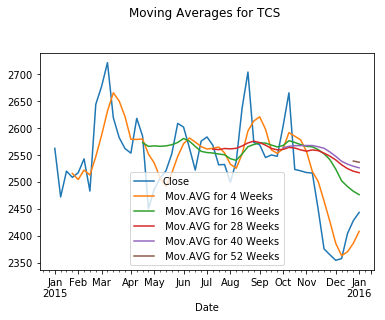

In [25]:
plot_time_series(TCS)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    1993.800000
2015-01-11    1992.310000
2015-01-18    2117.210000
2015-01-25    2161.620000
2015-02-01    2142.112500
2015-02-08    2164.980000
2015-02-15    2283.870000
2015-02-22    2295.762500
2015-03-01    2279.383333
2015-03-08    2277.950000
2015-03-15    2201.790000
2015-03-22    2244.910000
2015-03-29    2202.500000
2015-04-05    2206.766667
2015-04-12    2197.440000
2015-04-19    2206.600000
2015-04-26    2105.930000
2015-05-03    1962.237500
2015-05-10    1955.970000
2015-05-17    1958.800000
2015-05-24    2031.520000
2015-05-31    2006.470000
2015-06-07    2023.410000
2015-06-14    1998.270000
2015-06-21     996.560000
2015-06-28    1003.010000
2015-07-05     990.040000
2015-07-12     959.360000
2015-07-19     979.260000
2015-07-26    1080.530000
2015-08-02    1072.120000
2015-08-09    1081.020000
2015-08-16    1129.360000
2015-08-23    1153.300000
2015-08-30    1087.230000
2015-09-06    1091.230000
2015-09-13    1

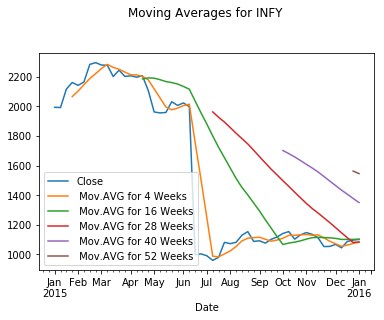

In [26]:
plot_time_series(INFY)

Calculated Moving Averages: for 4 weeks: 

 Date
2015-01-04    11293.9000
2015-01-11    11108.4500
2015-01-18    11598.0400
2015-01-25    11777.4900
2015-02-01    11787.9750
2015-02-08    12055.9700
2015-02-15    12298.5000
2015-02-22    12603.9250
2015-03-01    12567.3500
2015-03-08    12728.9250
2015-03-15    12383.0900
2015-03-22    12343.4000
2015-03-29    12104.1300
2015-04-05    12045.3500
2015-04-12    12149.4100
2015-04-19    12087.6000
2015-04-26    11439.2800
2015-05-03    11061.5750
2015-05-10    11120.0700
2015-05-17    11175.8000
2015-05-24    11514.0700
2015-05-31    11519.7300
2015-06-07    11381.0800
2015-06-14    11211.9500
2015-06-21    11163.1100
2015-06-28    11339.5300
2015-07-05    11154.1100
2015-07-12    11000.4400
2015-07-19    11130.7500
2015-07-26    11517.8000
2015-08-02    11425.6200
2015-08-09    11542.7000
2015-08-16    11859.2800
2015-08-23    12085.5600
2015-08-30    11420.2300
2015-09-06    11554.6600
2015-09-13    11408.5000
2015-09-20    11597.5000
2

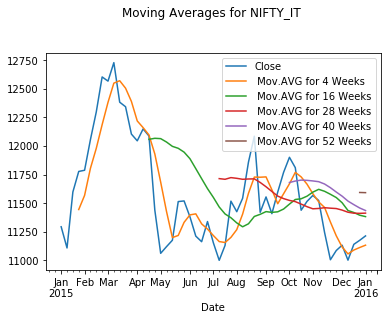

In [27]:
plot_time_series(NIFTY)

In [28]:
TCS = TCS.asfreq('D', method ='pad')        
INFY = INFY.asfreq('D', method ='pad')
NIFTY = NIFTY.asfreq('D', method ='pad')


TCS.name = 'TCS'
INFY.name = 'INFY'
NIFTY.name = 'NIFTY_IT'

### Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays. You should look to increase your rolling window size to 75 and see how the data looks like.

In [32]:
def plot_roll_window(stock, win = [10, 75]):
    
    dummy = pd.DataFrame()
    
    dummy['Close'] = stock['Close']
     
    for i in range(len(win)):
        m_a = dummy['Close'].rolling(win[i]).mean() # M.A using predefined function
        dummy[" Mov.AVG for " + str(win[i])+ " Roll Window"] = m_a
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(win[i], dummy['Close']))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    2545.55
2015-01-02    2579.45
2015-01-03    2579.45
2015-01-04    2579.45
2015-01-05    2540.25
2015-01-06    2446.60
2015-01-07    2417.70
2015-01-08    2443.80
2015-01-09    2512.30
2015-01-10    2512.30
2015-01-11    2512.30
2015-01-12    2509.70
2015-01-13    2497.90
2015-01-14    2521.95
2015-01-15    2539.10
2015-01-16    2532.15
2015-01-17    2532.15
2015-01-18    2532.15
2015-01-19    2511.00
2015-01-20    2500.45
2015-01-21    2513.80
2015-01-22    2513.55
2015-01-23    2503.60
2015-01-24    2503.60
2015-01-25    2503.60
2015-01-26    2503.60
2015-01-27    2502.05
2015-01-28    2539.60
2015-01-29    2544.65
2015-01-30    2482.05
               ...   
2015-12-02    2365.20
2015-12-03    2350.75
2015-12-04    2328.40
2015-12-05    2328.40
2015-12-06    2328.40
2015-12-07    2319.80
2015-12-08    2329.00
2015-12-09    2367.65
2015-12-10    2384.55
2015-12-11    2386.00
2015-12-12    2386.00
2015-12-13    2386.00
2015

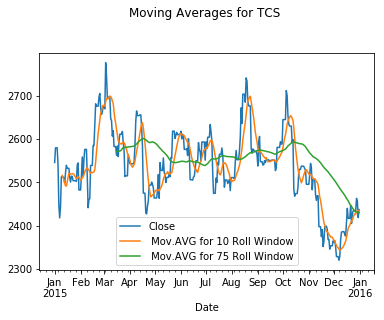

In [33]:
plot_roll_window(TCS)

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    1974.40
2015-01-02    2013.20
2015-01-03    2013.20
2015-01-04    2013.20
2015-01-05    1995.90
2015-01-06    1954.20
2015-01-07    1963.55
2015-01-08    1973.45
2015-01-09    2074.45
2015-01-10    2074.45
2015-01-11    2074.45
2015-01-12    2115.95
2015-01-13    2088.90
2015-01-14    2128.65
2015-01-15    2134.25
2015-01-16    2118.30
2015-01-17    2118.30
2015-01-18    2118.30
2015-01-19    2102.50
2015-01-20    2124.20
2015-01-21    2169.90
2015-01-22    2196.45
2015-01-23    2215.05
2015-01-24    2215.05
2015-01-25    2215.05
2015-01-26    2215.05
2015-01-27    2136.50
2015-01-28    2144.55
2015-01-29    2145.50
2015-01-30    2141.90
               ...   
2015-12-02    1060.70
2015-12-03    1057.75
2015-12-04    1049.05
2015-12-05    1049.05
2015-12-06    1049.05
2015-12-07    1046.25
2015-12-08    1044.40
2015-12-09    1028.20
2015-12-10    1047.35
2015-12-11    1052.80
2015-12-12    1052.80
2015-12-13    1052.80
2015

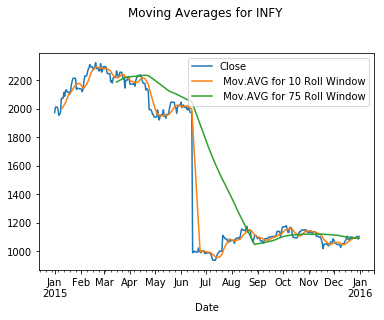

In [34]:
plot_roll_window(INFY)

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    11215.70
2015-01-02    11372.10
2015-01-03    11372.10
2015-01-04    11372.10
2015-01-05    11248.55
2015-01-06    10959.90
2015-01-07    10916.00
2015-01-08    11018.15
2015-01-09    11399.65
2015-01-10    11399.65
2015-01-11    11399.65
2015-01-12    11543.65
2015-01-13    11502.80
2015-01-14    11614.30
2015-01-15    11669.85
2015-01-16    11659.60
2015-01-17    11659.60
2015-01-18    11659.60
2015-01-19    11642.75
2015-01-20    11695.00
2015-01-21    11813.70
2015-01-22    11850.85
2015-01-23    11885.15
2015-01-24    11885.15
2015-01-25    11885.15
2015-01-26    11885.15
2015-01-27    11693.45
2015-01-28    11809.55
2015-01-29    11824.15
2015-01-30    11824.75
                ...   
2015-12-02    11149.60
2015-12-03    11081.90
2015-12-04    10969.05
2015-12-05    10969.05
2015-12-06    10969.05
2015-12-07    10998.65
2015-12-08    10981.85
2015-12-09    10930.05
2015-12-10    11055.50
2015-12-11    11043.05
2015-12

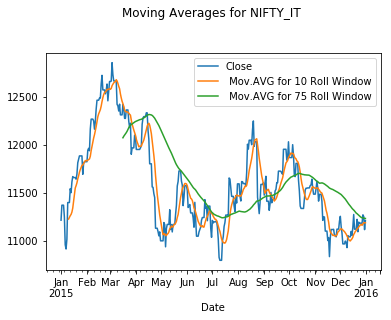

In [35]:
plot_roll_window(NIFTY)

### Volume shocks - If volume traded is 10% higher/lower than previous day - make a 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.

In [37]:
def volume_shocks(stock):
    stock["vol_t+1"] = stock.Volume.shift(1)  #next rows value
    
    stock["volume_shock"] = ((abs(stock["vol_t+1"] - stock["Volume"])/stock["Volume"]*100)  > 10).astype(int)
    
    return stock

volume_shocks(TCS)
volume_shocks(INFY)
volume_shocks(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock
Date,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1


In [38]:
def direction_fun(stock):
    
    # considerng only shock - 1 valued rows.
    # 0 - negative and 1- positive
    if stock["volume_shock"] == 0:
        pass
    else:
        if (stock["vol_t+1"] - stock["Volume"]) < 0:
            return 0
        else:
            return 1

In [40]:
def vol_shock_direction(stock):
    stock['VOL_SHOCK_DIR'] = 'Nan'
    stock['VOL_SHOCK_DIR'] = stock.apply(direction_fun, axis=1)
    return stock

vol_shock_direction(TCS)
vol_shock_direction(INFY)
vol_shock_direction(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR
Date,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0


### Price shocks - If closing price at T vs T+1 has a difference > 2%, then 0/1 boolean time series for shock, 0/1 dummy-coded time series for direction of shock.

In [42]:
def price_shocks(stock):
    """
    'ClosePrice' - Close_t
    'Close Price next day - vol_t+1
    
    """
    stock["price_t+1"] = stock.Close.shift(1)  #next rows value
    
    stock["price_shock"] = (abs((stock["price_t+1"] - stock["Close"])/stock["Close"]*100)  > 2).astype(int)
    
    stock["price_black_swan"] = stock['price_shock'] # Since both had same data anad info/
    
    return stock

price_shocks(TCS)
price_shocks(INFY)
price_shocks(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0,11248.55,1,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0,10959.90,0,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0,10916.00,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0,11018.15,1,1


In [43]:
def direction_fun_price(stock):
    
    if stock["price_shock"] == 0:
        pass
    else:
        if (stock["price_t+1"] - stock["Close"]) < 0:
            return 0
        else:
            return 1

In [45]:
def price_shock_direction(stock):
    stock['PRICE_SHOCK_DIR'] = 'Nan'
    stock['PRICE_SHOCK_DIR'] = stock.apply(direction_fun_price, axis=1)
    return stock

vol_shock_direction(TCS)
vol_shock_direction(INFY)
vol_shock_direction(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0,11248.55,1,1
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0,10959.90,0,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0,10916.00,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0,11018.15,1,1


### Pricing shock without volume shock - based on points a & b - Make a 0/1 dummy time series.
 

In [47]:
def price_shock_wo_vol_shock(stock):
    
    stock["not_vol_shock"]  = (~(stock["volume_shock"].astype(bool))).astype(int)
    stock["price_shock_w/0_vol_shock"] = stock["not_vol_shock"] & stock["price_shock"]
    
    return stock

price_shock_wo_vol_shock(TCS)
price_shock_wo_vol_shock(INFY)
price_shock_wo_vol_shock(NIFTY)

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear,vol_t+1,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,,,,,
2015-01-01,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015,1,1,1,NaN,0,NaN,NaN,0,0,1,0
2015-01-02,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,4246150.0,1,0.0,11215.70,0,0,0,0
2015-01-03,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,1,0
2015-01-04,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015,1,2,1,10004862.0,0,NaN,11372.10,0,0,1,0
2015-01-05,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015,1,5,2,10004862.0,1,1.0,11372.10,0,0,0,0
2015-01-06,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015,1,6,2,8858018.0,1,0.0,11248.55,1,1,0,0
2015-01-07,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015,1,7,2,12515739.0,1,1.0,10959.90,0,0,0,0
2015-01-08,2015-01-08,11031.15,11058.15,10915.05,11018.15,12975117,1.485630e+10,2015,1,8,2,10976356.0,1,0.0,10916.00,0,0,0,0
2015-01-09,2015-01-09,11058.05,11484.90,10932.20,11399.65,24812224,3.536420e+10,2015,1,9,2,12975117.0,1,0.0,11018.15,1,1,0,0


### Data Visualisation using Bokeh..

In [51]:
import bokeh
from bokeh.plotting import figure, output_file, show

def bokeh_plot(stock):
    data = dict(stock=stock['Close'], Date=stock.index)
    
    p = figure(plot_width=800, plot_height=250,  title = 'time series for {}' .format(stock.name), x_axis_type="datetime")
    p.line(stock.index, stock['Close'], color='blue', alpha=0.5)
    
    #show price shock w/o vol shock
    
    p.circle(stock.index, stock.Close*stock["price_shock_w/0_vol_shock"], size=4, legend='price shock without vol shock')
    show(p)

In [52]:
output_file("timeseries.html")

bokeh_plot(TCS)
bokeh_plot(INFY)
bokeh_plot(NIFTY)

In [53]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(stock):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(stock.name))

    partial_autocorr = pacf(stock["Close"], nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [56]:
import warnings
warnings.filterwarnings('ignore')
                        
output_file("PACF.html")

draw_pacf(TCS)
draw_pacf(INFY)
draw_pacf(NIFTY)

### Auto Correlation plot..

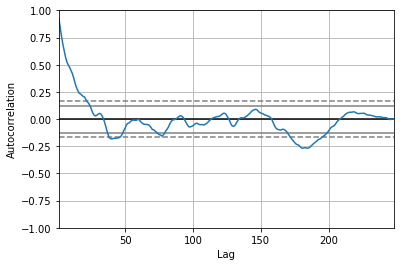

In [58]:
pd.plotting.autocorrelation_plot(tcs.Close);

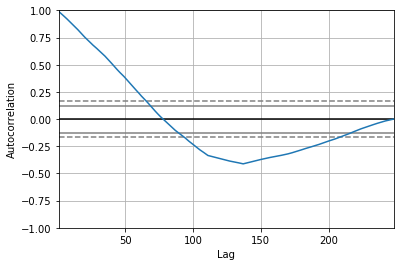

In [59]:
pd.plotting.autocorrelation_plot(infy.Close);

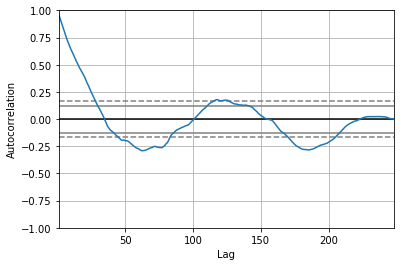

In [60]:
pd.plotting.autocorrelation_plot(nifty.Close);

In [108]:
from nsepy import get_history
from datetime import date

from nsepy.derivatives import get_expiry_date
expiry = get_expiry_date(year=2018, month=12)
expiry

datetime.date(2018, 12, 27)

In [0]:
tcs = get_history(symbol='TCS',
                   start=date(2017,1,1),
                   end=date(2018,12,31))

In [0]:
import pandas as pd
tcs.insert(0, 'Date',  pd.to_datetime(tcs.index,format='%Y-%m-%d') )

In [0]:
TCS["Date"] = pd.to_datetime(TCS["Date"])

In [0]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

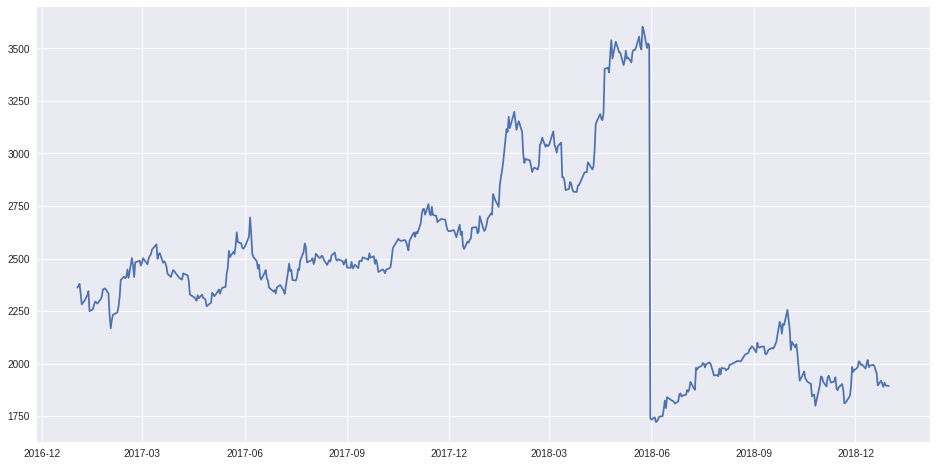

In [114]:
#setting index as date
TCS['Date'] = pd.to_datetime(TCS.Date,format='%Y-%m-%d')
TCS.index = TCS['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(TCS['Close'], label='Close Price history')

In [0]:
#creating dataframe with date and the target variable
data = TCS.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(TCS)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [0]:
#splitting into train and validation
train = new_data[:360]
valid = new_data[360:]

In [117]:
new_data.shape, train.shape, valid.shape

((494, 2), (360, 2), (134, 2))

In [118]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2017-01-02 00:00:00'),
 Timestamp('2018-06-13 00:00:00'),
 Timestamp('2018-06-14 00:00:00'),
 Timestamp('2018-12-31 00:00:00'))

In [0]:
#make predictions
preds = []
for i in range(0,134):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [120]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

855.3841324457386

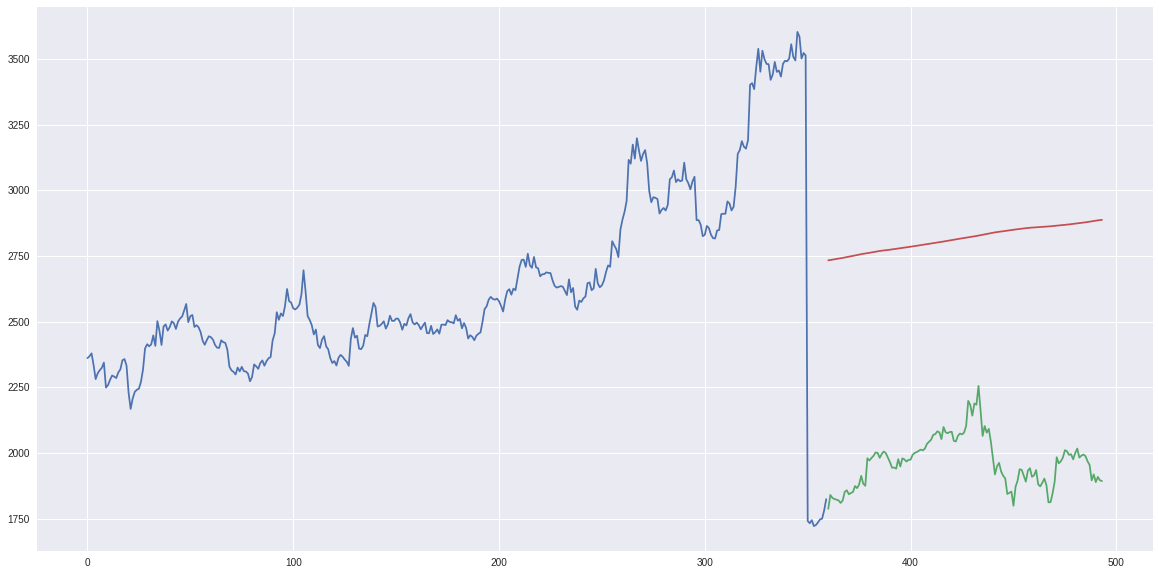

In [121]:
import warnings
warnings.filterwarnings('ignore')
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [0]:
#setting index as date values
TCS['Date'] = pd.to_datetime(TCS.Date,format='%Y-%m-%d')
TCS.index = TCS['Date']

#sorting
data = TCS.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(TCS)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [0]:
#create features
import fastai
from fastai.structured import *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [0]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

## Linear Regression Algorithm

In [128]:
#split into train and validation
train = new_data[:360]
valid = new_data[360:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms = np.sqrt(np.mean(np.power((np.array(y_valid)- np.array(preds)),2)))
rms

1169.5893219556835

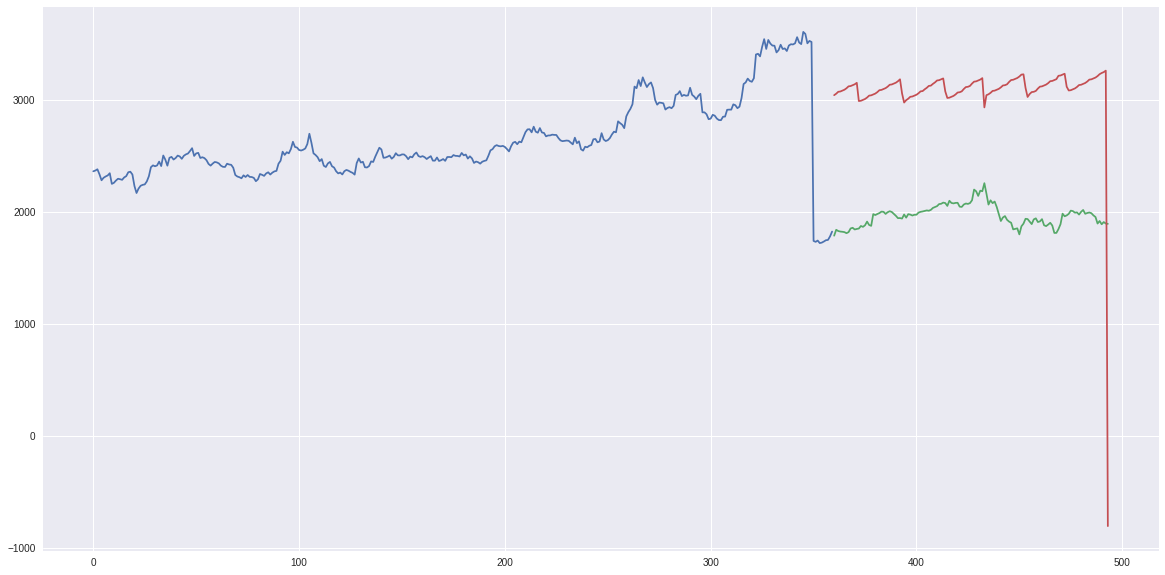

In [130]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[360:].index
train.index = new_data[:360].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

## Gradient Boosting Decision Trees Algorithm

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

clf =  GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls')
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [152]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms = np.sqrt(np.mean(np.power((np.array(y_valid)- np.array(preds)),2)))
rms

1169.5893219556835

## Long Short Term Memory (LSTM)

### Introduction

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

   The input gate: The input gate adds information to the cell state
   The forget gate: It removes the information that is no longer required by the model
   The output gate: Output Gate at LSTM selects the information to be shown as output

 
### Implementation

In [96]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = TCS.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(TCS)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:360,:]
valid = dataset[360:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 19s - loss: 0.0269


In [97]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

72.02436643052881

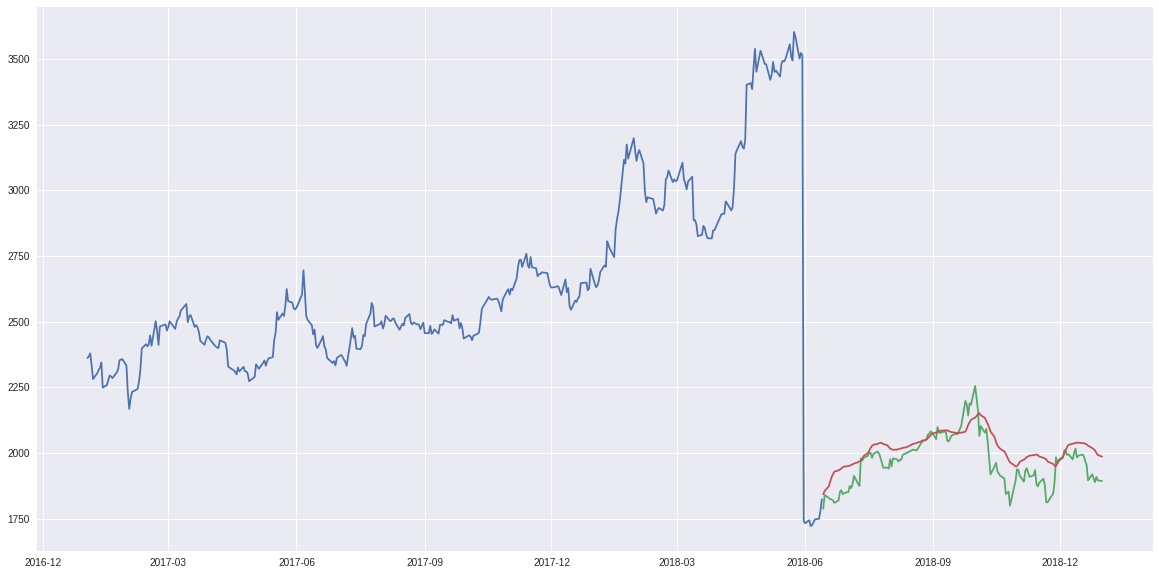

In [98]:
#for plotting
train = new_data[:360]
valid = new_data[360:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])



## Compared to Linear Regression, Gradient Boosting Decision Trees Algorithm, LSTM got very low RMS(Root Mean Square Error)